**Fraud Detection Analysis**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, r2_score, precision_recall_curve

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [3]:
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, recall_score
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("creditcard.csv")
#This dataset has 28 Principle Components which have been kept inorder to protect the privacy of the users.
#The only features which are not changed are the 'Time','Amount' and 'Class' column.

#Looking at the first five rows of the dataset. 
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: xlabel='Class', ylabel='count'>

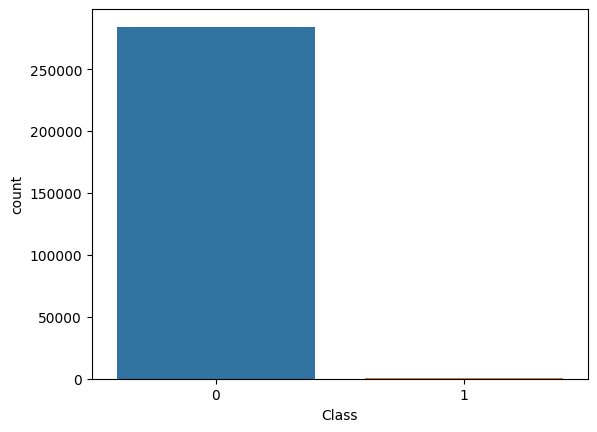

In [6]:
sns.countplot(x = 'Class', data = data)
#As you can see there is lot of imbalance in the data. The number of 

In [7]:
100*data['Class'].value_counts()/len(data['Class'])
#As you can see, around 99.8% of the data in Class columns contains non-defaults

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [8]:
data.isnull().sum()
#There are no null values in any of the columns 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# We next need to scale the data 


In [10]:
from sklearn.preprocessing import RobustScaler

In [11]:
robust_scaler = RobustScaler()
# scaled_amt,scaled_time = [],[]

In [12]:
scaled_amt = robust_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
scaled_time = robust_scaler.fit_transform(data['Time'].values.reshape(-1,1))

In [13]:
#Now we can drop the previously present unscaled time and amount columns

data.drop(['Amount','Time'], axis = 1, inplace = True)

data.insert(0, "Amount-scaled", scaled_amt)
data.insert(1, "Time-scaled",scaled_time)

In [14]:
data[['Amount-scaled','Class']].corr()
# As can be seen from the table below, the relation between Amount and Default is not very high


,Amount-scaled,Class
Amount-scaled,1.000000,0.005632
Class,0.005632,1.000000


In [15]:
# As can be seen from the table below, the relation between Time and Default is not very high

data[['Time-scaled','Class']].corr()

,Time-scaled,Class
Time-scaled,1.000000,-0.012323
Class,-0.012323,1.000000


In [16]:
data.head()

,Amount-scaled,Time-scaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [17]:
# amount of fraud classes 492 rows.
defaulter_data = data[data['Class'] == 1]
non_defaulter_data = data[data['Class'] == 0].sample(defaulter_data.shape[0])

comb_data = pd.concat([defaulter_data, non_defaulter_data])

# Shuffle dataframe rows
updated_df = comb_data.sample(frac=1, random_state=77)

updated_df.head()

,Amount-scaled,Time-scaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
69237,1.151261,-0.368449,-0.170448,-0.023270,1.054175,-1.493803,-0.038795,-0.009680,0.857197,-0.208374,...,0.398537,-0.068997,-0.347737,0.157613,-0.338610,-0.122867,-0.569421,-0.173203,-0.213595,0
160506,0.125760,0.337551,-0.454302,0.941429,-0.027740,1.985270,0.895001,-0.377375,0.465515,-0.091926,...,0.023990,0.316074,0.992162,-0.441383,-0.424221,-0.220432,-0.022467,0.004004,0.231873,0
10630,10.401174,-0.785418,-5.187878,6.967709,-13.510931,8.617895,-11.214422,0.672248,-9.462533,5.328704,...,-0.623737,2.086083,0.760190,0.716806,-0.646743,-1.617043,0.172347,0.626647,-0.169726,1
204165,0.754419,0.592711,1.825269,-0.598655,-1.538237,0.836735,1.885178,4.178777,-1.062359,1.076683,...,0.057315,-0.293348,-1.149013,0.538602,0.732557,-1.050375,1.833597,-0.159877,-0.054703,0
96789,1.110878,-0.220350,-3.593476,0.781442,-1.822448,0.605761,-1.194656,-0.517195,-1.722523,0.128890,...,-0.478219,0.351792,0.391249,-0.252875,-0.498042,0.010172,0.909929,-1.478767,0.722673,1


In [18]:
#Splitting original dataset

from sklearn.model_selection import train_test_split

#Splitting the data into testing and training sets
X = data.drop('Class', axis = 1)
Y = data['Class']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 77)

In [19]:
#Splitting the undersample data into testing and training sets
X_undersample = updated_df.drop('Class', axis = 1)
Y_undersample = updated_df['Class']

In [20]:
from sklearn.model_selection import train_test_split
X_train_u,X_test_u,Y_train_u,Y_test_u = train_test_split(X_undersample,Y_undersample, test_size = 0.25, random_state = 77)

In [21]:
print("The dimension of the X_train dataset:" ,X_train_u.shape )
print("The dimension of the X_test dataset:" ,X_test_u.shape )
print("The dimension of the Y_train dataset:" ,Y_train_u.shape )
print("The dimension of the Y_test dataset:" ,Y_test_u.shape )

The dimension of the X_train dataset: (738, 30)
The dimension of the X_test dataset: (246, 30)
The dimension of the Y_train dataset: (738,)
The dimension of the Y_test dataset: (246,)


In [22]:
#We will now train our logistic regression model and get hyperparameters from the model to test the optimal model on the original dataset.

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
#We will now user grid search cv to find the optimal parameters of the model
from sklearn.model_selection import GridSearchCV


# Hyperparameters for the logistic regression model. Applying regularization with variying degrees of the parameter c 
logit_params = {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 1, 5, 10, 100, 500, 1000]}

grid_model = GridSearchCV(LogisticRegression(solver = 'liblinear', random_state = 77), logit_params)
grid_model.fit(X_train_u,Y_train_u)

grid_model.best_estimator_



/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=1, penalty='l1', random_state=77, solver='liblinear')

In [25]:
#As we can see from the model above, the bestimator happens to be l1(Lasso) with C=1. The value of C is not very high which suggests that the training data is not that highly reliable as well

In [26]:
optimal_log_model = grid_model.best_estimator_

In [27]:
#Since we have got the best parameters for the logistic regression model. We will do cross validation on the train dataset with the given parameters to understand how the model performs on the train dataset

In [28]:
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score

In [29]:
log_cv_scores = cross_val_score(optimal_log_model, X_train_u, Y_train_u, cv = 10)

In [30]:
log_cv_pred = cross_val_predict(optimal_log_model,X_train_u,Y_train_u,cv=10, method = 'predict')

In [31]:
print('ROC-AUC Score for Logistic Regression Model with Optimal Parameters: ', round(roc_auc_score(Y_train_u, log_cv_pred),2))

ROC-AUC Score for Logistic Regression Model with Optimal Parameters:  0.94


In [32]:
from sklearn.metrics import recall_score, precision_score,f1_score,accuracy_score
print('Recall Score for Logistic Regression Model with Optimal Parameters: ', round(recall_score(Y_train_u, log_cv_pred),2))


Recall Score for Logistic Regression Model with Optimal Parameters:  0.92


In [33]:
optimal_log_model.fit(X_train_u,Y_train_u)
preds_u = optimal_log_model.predict(X_test_u)
print("Recall value on the undersampled test dataset: ", round(recall_score(Y_test_u, preds_u),2))
print("Accuracy value on the undersampled test dataset: ", round(accuracy_score(Y_test_u, preds_u),2))

Recall value on the undersampled test dataset:  0.91
Accuracy value on the undersampled test dataset:  0.9


In [34]:
# We are getting a recall value of around 90% on the test data which is good.

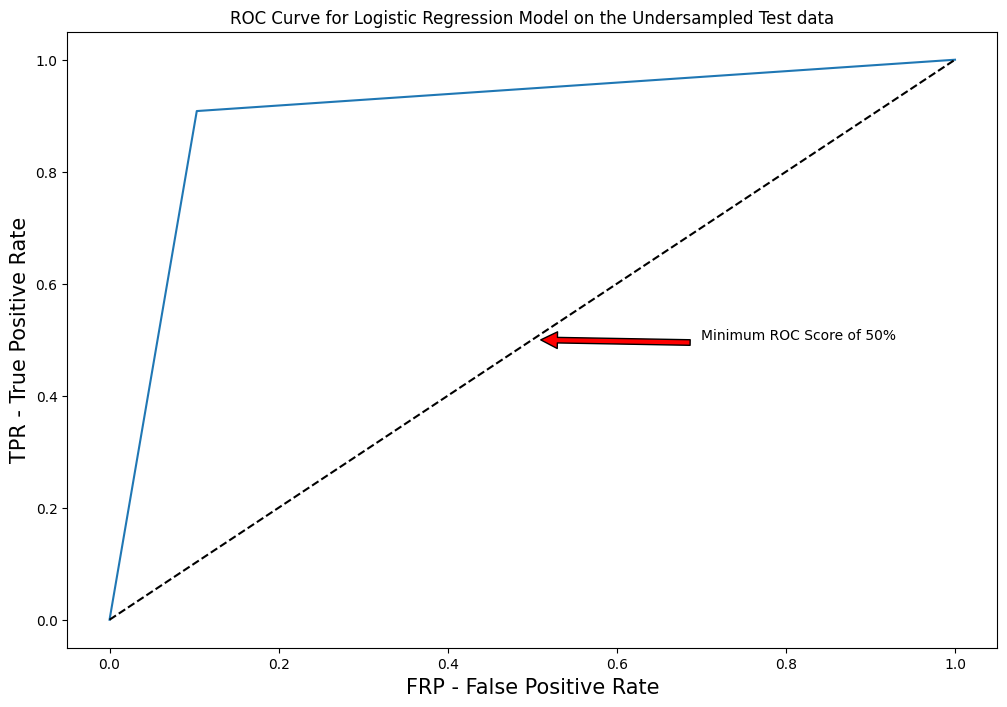

In [35]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc(data,Y_test, preds):
    log_fpr, log_tpr, log_thresold = roc_curve(Y_test, preds)
    plt.figure(figsize=(12,8))
    plt.xlabel('FRP - False Positive Rate', fontsize=15)
    plt.ylabel('TPR - True Positive Rate', fontsize=15)
    plt.title("ROC Curve for Logistic Regression Model on the {}".format(data))
    plt.plot(log_fpr, log_tpr)
             #, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(Y_train_u, log_cv_pred)))                                                                                      plt.plot([0, 1], [0, 1], 'k--')
    #plt.axis([-0.01, 1, 0, 1])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.annotate('Minimum ROC Score of 50% ', xy=(0.5, 0.5), xytext=(0.7, 0.5),arrowprops=dict(facecolor='red', shrink=0.05),)

plot_roc("Undersampled Test data", Y_test_u, preds_u)

In [36]:
#Now we will use these hyperparameters to train the model on the overall data and get the accuracy on the overall test data

In [37]:
optimal_log_model

LogisticRegression(C=1, penalty='l1', random_state=77, solver='liblinear')

In [38]:
optimal_log_model.fit(X_train,Y_train)

LogisticRegression(C=1, penalty='l1', random_state=77, solver='liblinear')

In [39]:
preds = optimal_log_model.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix
print('Classification report:\n', classification_report(Y_test, preds))


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.83      0.61      0.70       123

    accuracy                           1.00     71202
   macro avg       0.92      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202



In [41]:
cnf_matrix = confusion_matrix(Y_test, preds)
print('Confusion matrix:\n', confusion_matrix(Y_test, preds))

Confusion matrix:
 [[71064    15]
 [   48    75]]


In [42]:
def accuracy_metrics(model_type, Y_test,preds):
    print("Model considered: {}".format(model_type))
    print("Recall value on the whole test dataset: ", round(recall_score(Y_test, preds),2))
    print("Precision score on the whole test dataset:",round(precision_score(Y_test, preds),2))
    print("F1 score on the whole test dataset:",round(f1_score(Y_test, preds),2))
    print("Accuracy score on the whole test dataset:",round(accuracy_score(Y_test, preds),2))
    print("R2 score on the whole test dataset:",round(r2_score(Y_test, preds),2))


In [43]:
accuracy_metrics("Logistic Regression",Y_test,preds)
# As you can see, our overall recal

Model considered: Logistic Regression
Recall value on the whole test dataset:  0.61
Precision score on the whole test dataset: 0.83
F1 score on the whole test dataset: 0.7
Accuracy score on the whole test dataset: 1.0
R2 score on the whole test dataset: 0.49


In [44]:
log_model_accuracy=[["Logistic Regression",round(recall_score(Y_test, preds),2),round(precision_score(Y_test, preds),2),round(f1_score(Y_test, preds),2),round(accuracy_score(Y_test, preds),2),round(r2_score(Y_test, preds),2)]]
model_output = pd.DataFrame(data = log_model_accuracy, columns = ['Model-type','Recall','Precision','F1-score','Accuracy','R2-score'])

In [45]:
model_output

,Model-type,Recall,Precision,F1-score,Accuracy,R2-score
0,Logistic Regression,0.61,0.83,0.7,1.0,0.49


In [46]:
#As expected, the accuracy is high due to the imbalance in the dataset.
#What we are more interested in is the recall score (True positivity rate) as we don't want to miss out on any fraudulent cases present in the data

# The recall score is around 61% which is not a good score and this could be due to using logistic regression model as well as the high imbalance in the dataset.

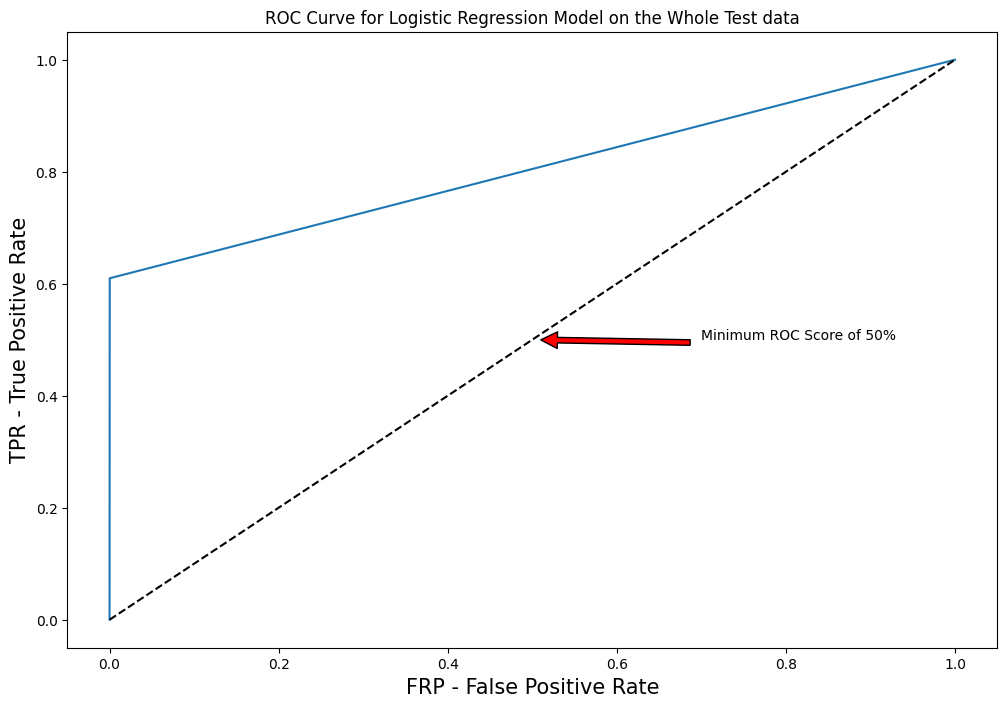

In [47]:
plot_roc("Whole Test data", Y_test, preds)

In [48]:
#However, this ROC is not that useful as the observations in the overall test dataset are not balanced.

**Random Forest**

Now we will use Random forest to classify as fraud and not fraud

In [49]:
rf = RandomForestClassifier(n_jobs= -1, 
                             random_state=42,
                             criterion= 'gini',
                             n_estimators=100,
                             verbose=False)

In [50]:
rf.fit(X_train_u, Y_train_u)

RandomForestClassifier(n_jobs=-1, random_state=42, verbose=False)

In [51]:
preds = rf.predict(X_test_u)

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test_u, preds)
print(confusion_matrix)
print(classification_report(Y_test_u, preds))

[[122   4]
 [ 12 108]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       126
           1       0.96      0.90      0.93       120

    accuracy                           0.93       246
   macro avg       0.94      0.93      0.93       246
weighted avg       0.94      0.93      0.93       246



In [53]:
roc_auc_score(Y_test_u, preds)

0.934126984126984

In [54]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [None, 3,5,7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a random forest classifier
rfc = RandomForestClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train_u, Y_train_u)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model performance on the test set
rfc_best = grid_search.best_estimator_
accuracy = rfc_best.score(X_test_u, Y_test_u)
print("Accuracy on test set:", accuracy)

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/varenium/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

Best hyperparameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy on test set: 0.9349593495934959


In [57]:
rfc_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, n_estimators=50)

In [58]:
pred = rfc_best.predict(X_test)

In [59]:
recall_score(Y_test, pred)

0.6991869918699187

In [60]:
accuracy_metrics("Random Forest",Y_test,pred)

Model considered: Random Forest
Recall value on the whole test dataset:  0.7
Precision score on the whole test dataset: 0.95
F1 score on the whole test dataset: 0.8
Accuracy score on the whole test dataset: 1.0
R2 score on the whole test dataset: 0.66


In [61]:
rf_model_accuracy=["Random Forest",round(recall_score(Y_test, pred),2),round(precision_score(Y_test, pred),2),round(f1_score(Y_test, pred),2),round(accuracy_score(Y_test, pred),2),round(r2_score(Y_test, pred),2)]
model_output.loc[len(model_output.index)] = rf_model_accuracy


In [62]:
model_output

,Model-type,Recall,Precision,F1-score,Accuracy,R2-score
0,Logistic Regression,0.61,0.83,0.7,1.0,0.49
1,Random Forest,0.70,0.95,0.8,1.0,0.66


**Xgboost**

Now, let us test a few parameters for Xgboost as well.

In [63]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9]
}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_u, Y_train_u)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model performance on the test set
xgb_best = grid_search.best_estimator_
accuracy = xgb_best.score(X_test_u, Y_test_u)
print("Accuracy on test set:", accuracy)

Best hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.5}
Accuracy on test set: 0.9105691056910569


In [64]:
#Now training and testing the best XGBoost model on the overall dataset

In [65]:
xgb_best.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [66]:
pred = xgb_best.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, pred)
print(confusion_matrix)
print(classification_report(Y_test, pred))

[[71074     5]
 [   28    95]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.77      0.85       123

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202



In [68]:
accuracy_score(Y_test, pred)

0.9995365298727564

In [69]:
recall_score(Y_test, pred)

0.7723577235772358

In [70]:
accuracy_metrics("XGBoost",Y_test,pred)

Model considered: XGBoost
Recall value on the whole test dataset:  0.77
Precision score on the whole test dataset: 0.95
F1 score on the whole test dataset: 0.85
Accuracy score on the whole test dataset: 1.0
R2 score on the whole test dataset: 0.73


In [71]:
xgb_model_accuracy=["XGBoost",round(recall_score(Y_test, pred),2),round(precision_score(Y_test, pred),2),round(f1_score(Y_test, pred),2),round(accuracy_score(Y_test, pred),2),round(r2_score(Y_test, pred),2)]
model_output.loc[len(model_output.index)] = xgb_model_accuracy

In [72]:
model_output

,Model-type,Recall,Precision,F1-score,Accuracy,R2-score
0,Logistic Regression,0.61,0.83,0.70,1.0,0.49
1,Random Forest,0.70,0.95,0.80,1.0,0.66
2,XGBoost,0.77,0.95,0.85,1.0,0.73


In [73]:
# Now we will try using neural network on the dataset to see if there is any difference in the accuracy.

In [74]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
    
nn_model = Sequential([
    Dense(100, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])


In [75]:
nn_model.compile(Adam(lr=0.005), loss='binary_crossentropy', metrics=["accuracy", tf.keras.metrics.Recall()])

/Users/varenium/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [76]:
hist = nn_model.fit(X_train, Y_train, validation_split=0.3, batch_size=30, epochs=25, shuffle=True, verbose=2)

Epoch 1/25


2023-03-23 22:18:45.271308: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4985/4985 - 2s - loss: 0.0060 - accuracy: 0.9991 - recall: 0.6378 - val_loss: 0.0040 - val_accuracy: 0.9994 - val_recall: 0.7913 - 2s/epoch - 458us/step
Epoch 2/25
4985/4985 - 2s - loss: 0.0047 - accuracy: 0.9993 - recall: 0.7323 - val_loss: 0.0036 - val_accuracy: 0.9995 - val_recall: 0.7826 - 2s/epoch - 409us/step
Epoch 3/25
4985/4985 - 2s - loss: 0.0046 - accuracy: 0.9993 - recall: 0.7244 - val_loss: 0.0039 - val_accuracy: 0.9992 - val_recall: 0.5913 - 2s/epoch - 410us/step
Epoch 4/25
4985/4985 - 2s - loss: 0.0037 - accuracy: 0.9993 - recall: 0.7362 - val_loss: 0.0054 - val_accuracy: 0.9993 - val_recall: 0.8348 - 2s/epoch - 419us/step
Epoch 5/25
4985/4985 - 2s - loss: 0.0043 - accuracy: 0.9993 - recall: 0.7323 - val_loss: 0.0049 - val_accuracy: 0.9995 - val_recall: 0.8000 - 2s/epoch - 448us/step
Epoch 6/25
4985/4985 - 2s - loss: 0.0048 - accuracy: 0.9992 - recall: 0.7008 - val_loss: 0.0073 - val_accuracy: 0.9993 - val_recall: 0.6609 - 2s/epoch - 408us/step
Epoch 7/25
4985/4985 - 2s -

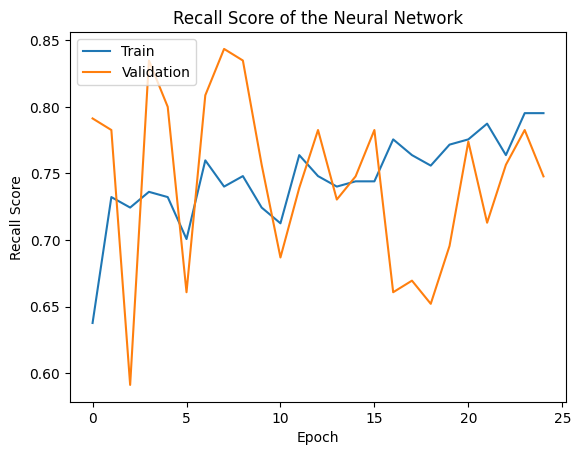

In [77]:
# Plot recall score vs epoch
import matplotlib.pyplot as plt

plt.plot(hist.history['recall'])
plt.plot(hist.history['val_recall'])
plt.title('Recall Score of the Neural Network')
plt.ylabel('Recall Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

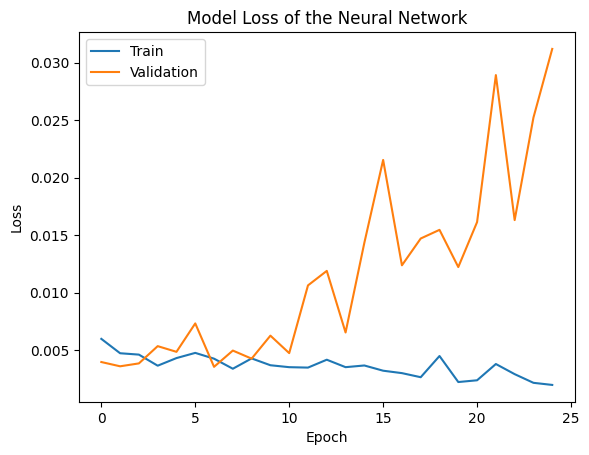

In [78]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss of the Neural Network')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [79]:
#We can see that the model has much better recall in the training data than the test data. There is a chance that the model might be overfitting and the model loss as we increase the number of epochs. This is something which could be kept in mind if we plan to further train the model 

In [80]:
from sklearn.metrics import confusion_matrix

nn_predictions = nn_model.predict(X_test, batch_size=200, verbose=0)
Y_pred = (nn_predictions > 0.5).astype(int)

# compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[71068    11]
 [   40    83]]


In [81]:
accuracy_metrics("Neural Network",Y_test,Y_pred)

Model considered: Neural Network
Recall value on the whole test dataset:  0.67
Precision score on the whole test dataset: 0.88
F1 score on the whole test dataset: 0.76
Accuracy score on the whole test dataset: 1.0
R2 score on the whole test dataset: 0.58


In [82]:
print('Classification report:\n', classification_report(Y_test, Y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.88      0.67      0.76       123

    accuracy                           1.00     71202
   macro avg       0.94      0.84      0.88     71202
weighted avg       1.00      1.00      1.00     71202



In [83]:
# As can be seen, the recall value and the R2 score for the neural network model is better than the logistic regression model. Therefore this model is better than the logistic regression model

In [84]:
nn_model_accuracy=["Neural Network",round(recall_score(Y_test, Y_pred),2),round(precision_score(Y_test, Y_pred),2),round(f1_score(Y_test, Y_pred),2),round(accuracy_score(Y_test, Y_pred),2),round(r2_score(Y_test, Y_pred),2)]
model_output.loc[len(model_output.index)] = nn_model_accuracy

**Final Results**

In [85]:
# Data Frame with model accuracy metrics of all the models considered
model_output

,Model-type,Recall,Precision,F1-score,Accuracy,R2-score
0,Logistic Regression,0.61,0.83,0.70,1.0,0.49
1,Random Forest,0.70,0.95,0.80,1.0,0.66
2,XGBoost,0.77,0.95,0.85,1.0,0.73
3,Neural Network,0.67,0.88,0.76,1.0,0.58


In [ ]:
i